# Anime Recommendation System

## Import Library

Pertama dilakukan beberapa library yang digunakan seperti Numpy, Matplotlib, Pandas, Seaborn, Scikit-learn, dan Tensorflow.

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

## Data Loading

Langkah ini digunakan untuk memuat dataset dari situs Kaggle

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("CooperUnion/anime-recommendations-database")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/CooperUnion/anime-recommendations-database/versions/1


In [5]:
anime = pd.read_csv('/root/.cache/kagglehub/datasets/CooperUnion/anime-recommendations-database/versions/1/anime.csv')
rating = pd.read_csv('/root/.cache/kagglehub/datasets/CooperUnion/anime-recommendations-database/versions/1/rating.csv')

In [6]:
print("total anime:", len(anime.anime_id.unique()))
print("total user:", len(rating.user_id.unique()))
print("total anime yang diberi rating:", len(rating.anime_id.unique()))

total anime: 12294
total user: 73515
total anime yang diberi rating: 11200


## Univariate Exploratory Data Analysis

Bagian ini adalah untuk menganalisis struktur data misalnya jumlah baris, kolom, baris duplikat, missing value, dan melihat data melalui statistik deskriptif

### Anime

In [7]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [24]:
anime.describe()

anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06

In [8]:
anime

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

In [18]:
# cek duplikat
anime.duplicated().sum()

np.int64(0)

In [19]:
# cek missing value
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Data anime memiliki beberapa missing value

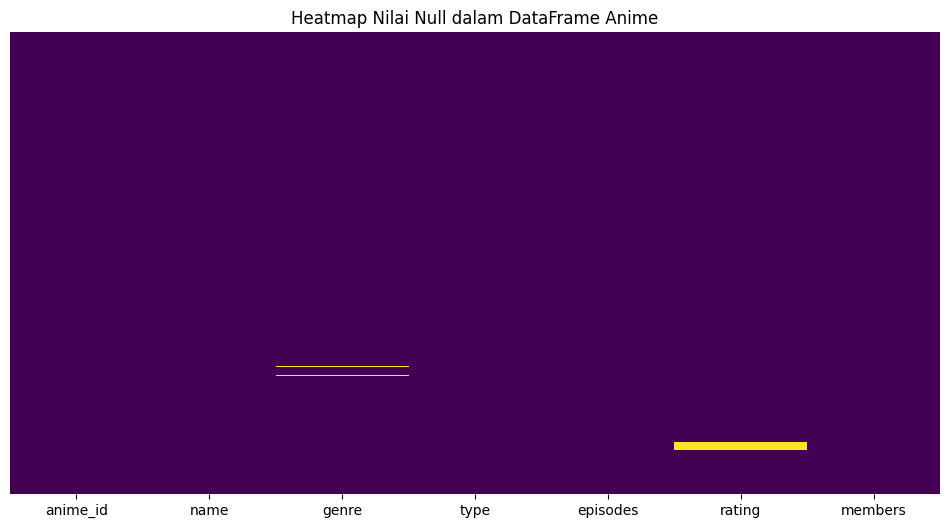

In [16]:
# Atur ukuran plot
plt.figure(figsize=(12, 6))

# Buat heatmap untuk menunjukkan nilai null
sns.heatmap(anime.isnull(),
            cmap='viridis',
            cbar=False,
            yticklabels=False
           )

plt.title("Heatmap Nilai Null dalam DataFrame Anime")
plt.show()

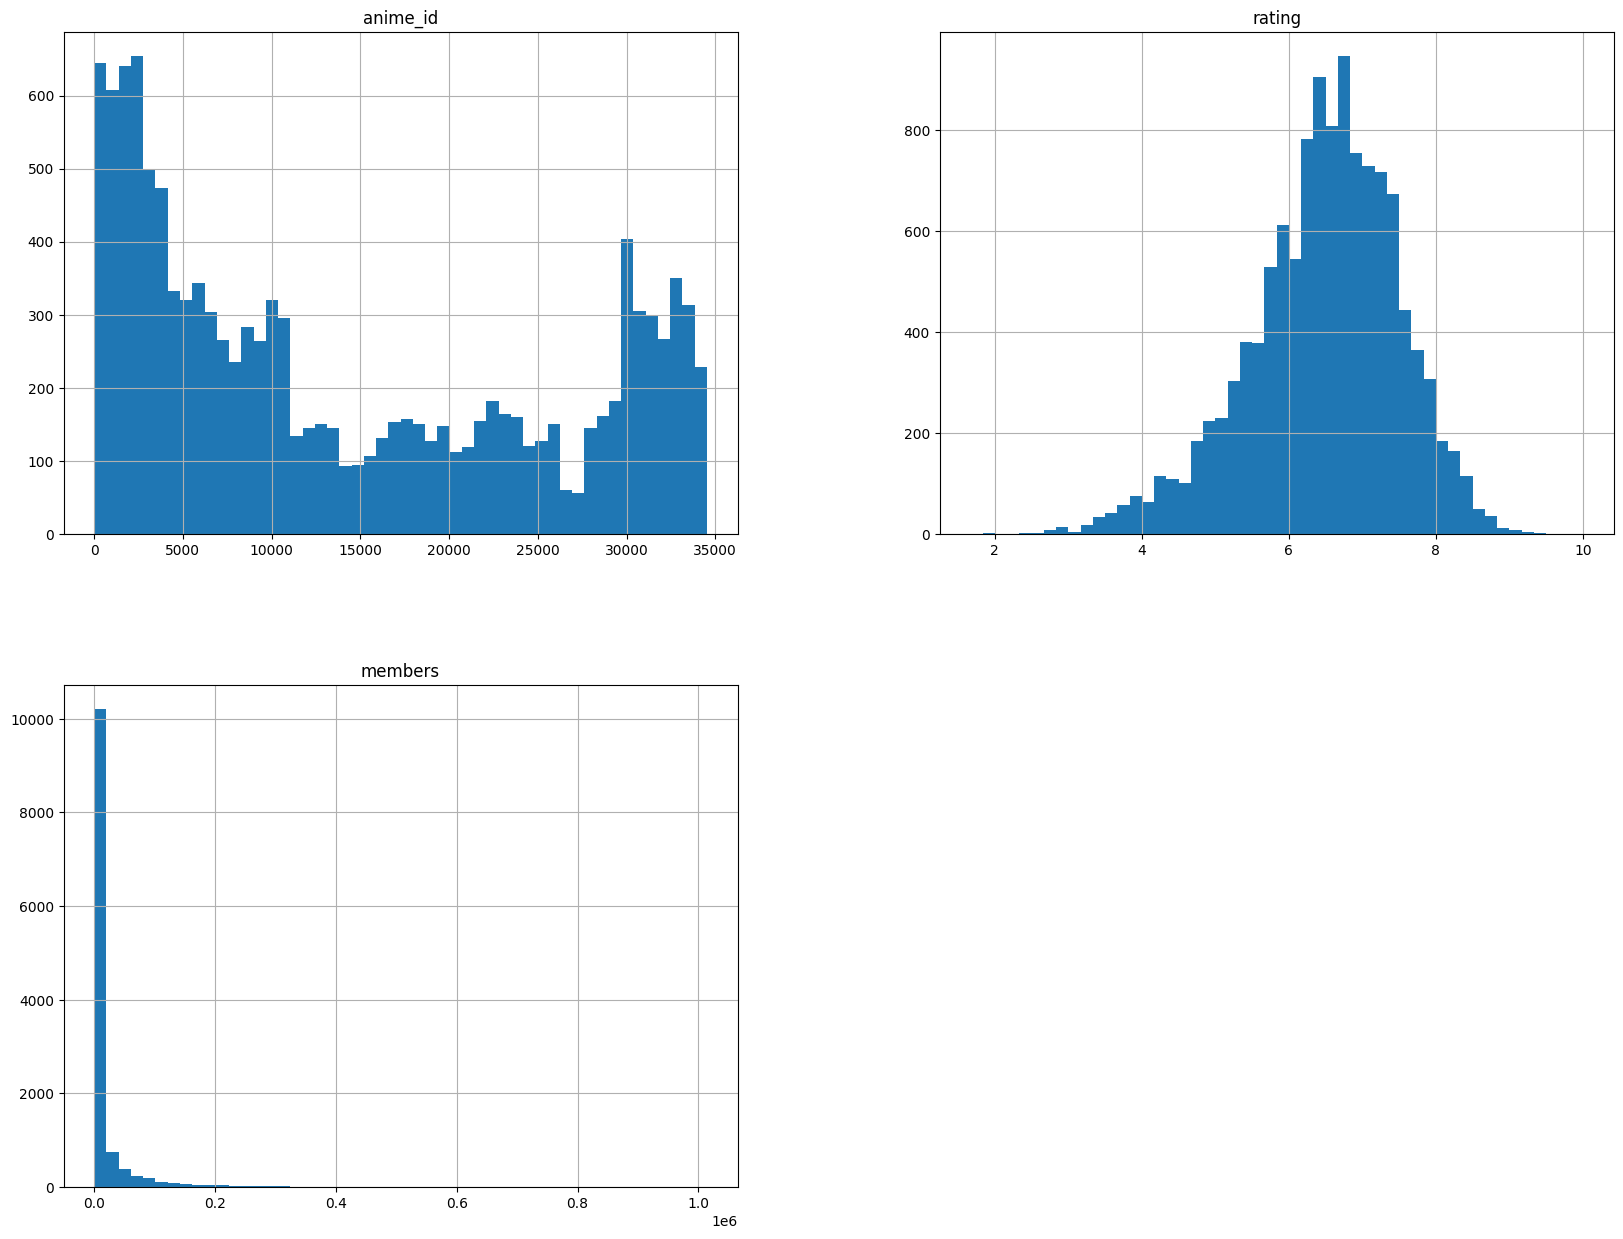

In [22]:
anime.hist(bins=50, figsize=(20,15))
plt.show()

dari grafik tersebut diketahui bahwa Rating anime berkisar di angka 6-7

### Rating

In [12]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [13]:
rating.describe()

user_id      anime_id        rating
count  7.813737e+06  7.813737e+06  7.813737e+06
mean   3.672796e+04  8.909072e+03  6.144030e+00
std    2.099795e+04  8.883950e+03  3.727800e+00
min    1.000000e+00  1.000000e+00 -1.000000e+00
25%    1.897400e+04  1.240000e+03  6.000000e+00
50%    3.679100e+04  6.213000e+03  7.000000e+00
75%    5.475700e+04  1.409300e+04  9.000000e+00
max    7.351600e+04  3.451900e+04  1.000000e+01

In [14]:
rating

user_id  anime_id  rating
0              1        20      -1
1              1        24      -1
2              1        79      -1
3              1       226      -1
4              1       241      -1
...          ...       ...     ...
7813732    73515     16512       7
7813733    73515     17187       9
7813734    73515     22145      10
7813735    73516       790       9
7813736    73516      8074       9

[7813737 rows x 3 columns]

In [20]:
# cek duplikat
rating.duplicated().sum()

np.int64(1)

Data rating memiliki 1 duplikat

In [21]:
# cek missing value
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

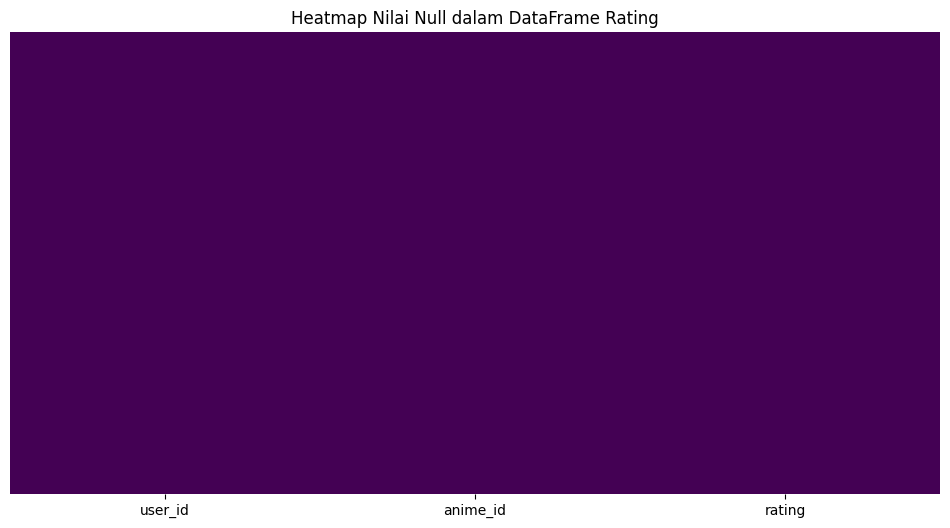

In [17]:
# Atur ukuran plot
plt.figure(figsize=(12, 6))

# Buat heatmap untuk menunjukkan nilai null
sns.heatmap(rating.isnull(),
            cmap='viridis',
            cbar=False,
            yticklabels=False
           )

plt.title("Heatmap Nilai Null dalam DataFrame Rating")
plt.show()

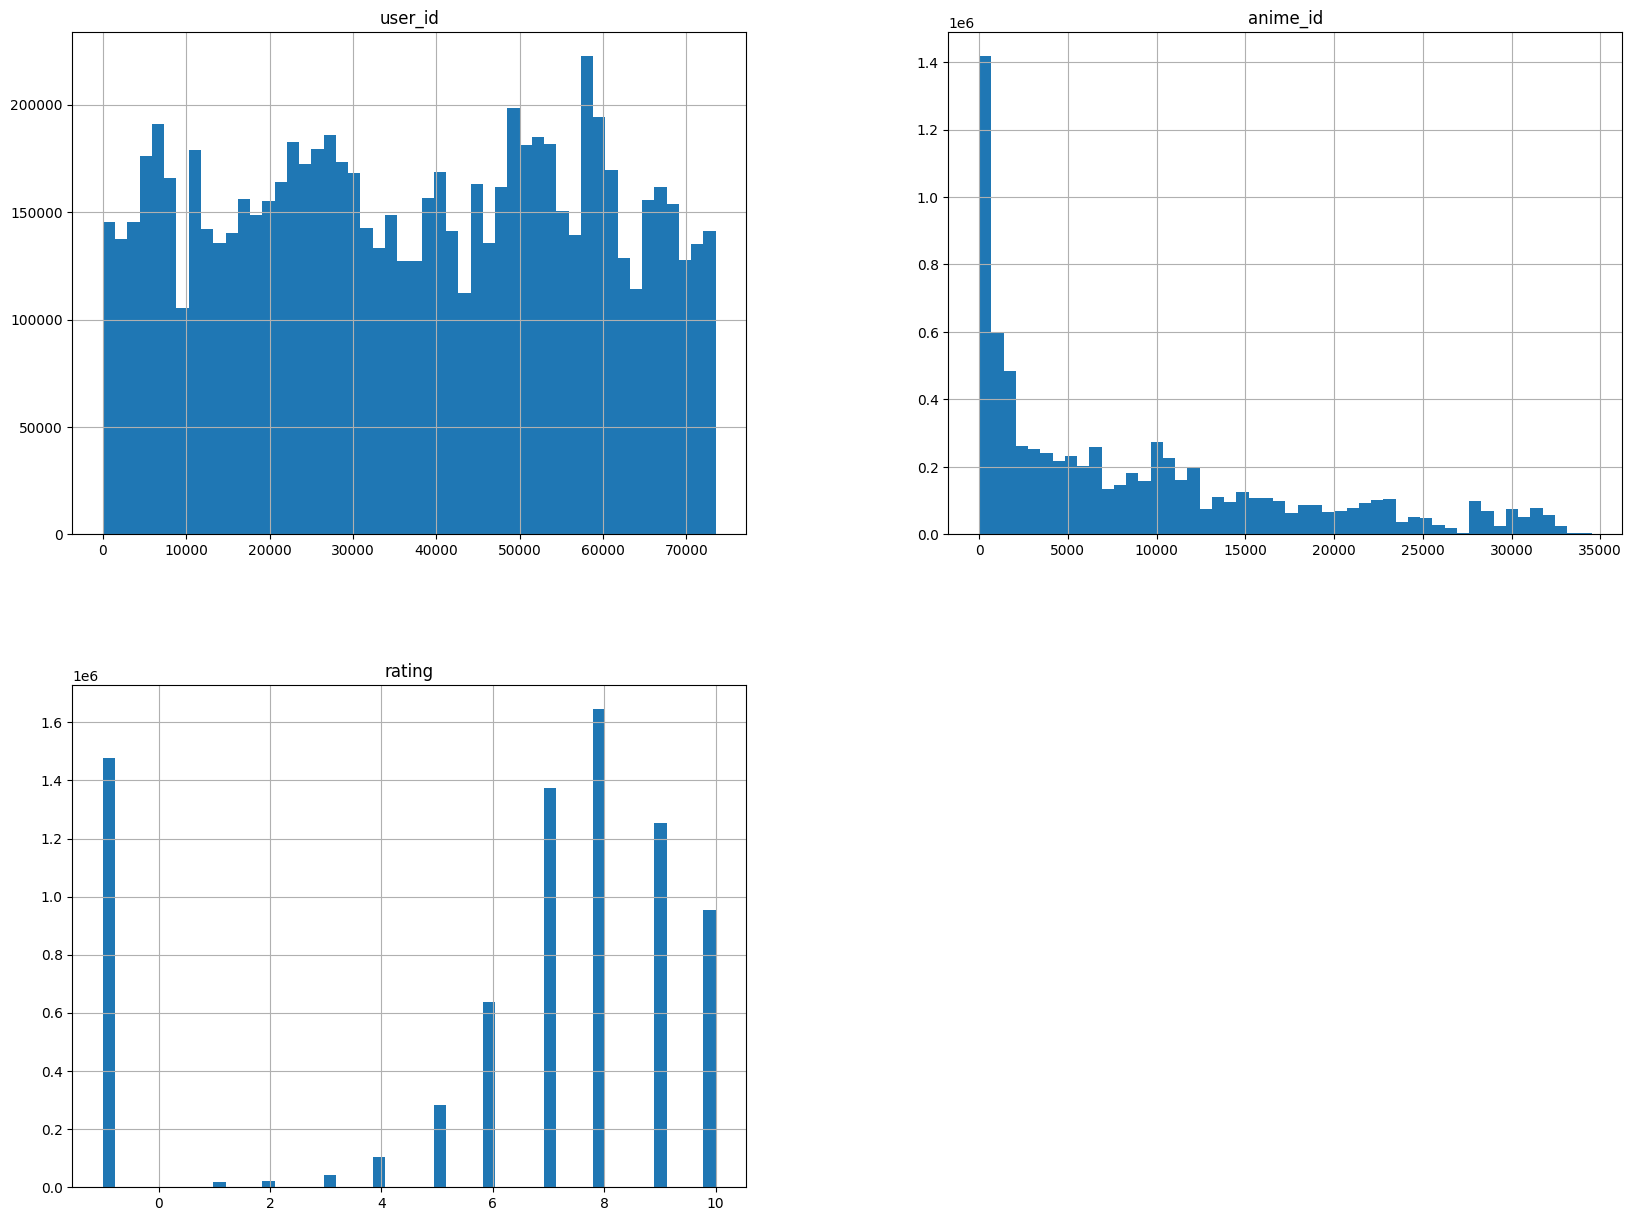

In [23]:
rating.hist(bins=50, figsize=(20,15))
plt.show()

Rating yang paling banyak diberikan user adalah 8

## Data Preprocessing

Sebelum dilakukan pengolahan data lebih jauh, data Anime digabung dengan data Rating berdasarkan fitur 'anime_id' untuk memudahkan pemrosesan karena menjadikannya satu dataframe.

### Menggabungkan Data dengan Fitur animeID

In [ ]:
data_merged = pd.merge(rating, anime, on='anime_id')

In [ ]:
data_merged

user_id  anime_id  rating_x  \
0              1        20        -1   
1              1        24        -1   
2              1        79        -1   
3              1       226        -1   
4              1       241        -1   
...          ...       ...       ...   
7813722    73515     16512         7   
7813723    73515     17187         9   
7813724    73515     22145        10   
7813725    73516       790         9   
7813726    73516      8074         9   

                                                    name  \
0                                                 Naruto   
1                                          School Rumble   
2                                               Shuffle!   
3                                             Elfen Lied   
4                              Girls Bravo: First Season   
...                                                  ...   
7813722                   Devil Survivor 2 The Animation   
7813723  Ghost in the Shell: Arise - Border:1 Ghost Pain   
7813724                     Kuroshitsuji: Book of Circus   
7813725                                       Ergo Proxy   
7813726                           Highschool of the Dead   

                                                     genre   type episodes  \
0        Action, Comedy, Martial Arts, Shounen, Super P...     TV      220   
1                         Comedy, Romance, School, Shounen     TV       26   
2        Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...     TV       24   
3        Action, Drama, Horror, Psychological, Romance,...     TV       13   
4           Comedy, Ecchi, Fantasy, Harem, Romance, School     TV       11   
...                                                    ...    ...      ...   
7813722                       Action, Demons, Supernatural     TV       13   
7813723               Mecha, Police, Psychological, Sci-Fi  Movie        1   
7813724  Comedy, Demons, Fantasy, Historical, Shounen, ...     TV       10   
7813725                     Mystery, Psychological, Sci-Fi     TV       23   
7813726                Action, Ecchi, Horror, Supernatural     TV       12   

         rating_y  members  
0            7.81   683297  
1            8.06   178553  
2            7.31   158772  
3            7.85   623511  
4            6.69    84395  
...           ...      ...  
7813722      7.06   101266  
7813723      7.64    31747  
7813724      8.37   122895  
7813725      8.03   265005  
7813726      7.46   535892  

[7813727 rows x 9 columns]

In [ ]:
data_merged.rename(columns={'rating_x': 'user_rating', 'rating_y': 'anime_rating'}, inplace=True)


In [ ]:
data_merged

user_id  anime_id  user_rating  \
0              1        20           -1   
1              1        24           -1   
2              1        79           -1   
3              1       226           -1   
4              1       241           -1   
...          ...       ...          ...   
7813722    73515     16512            7   
7813723    73515     17187            9   
7813724    73515     22145           10   
7813725    73516       790            9   
7813726    73516      8074            9   

                                                    name  \
0                                                 Naruto   
1                                          School Rumble   
2                                               Shuffle!   
3                                             Elfen Lied   
4                              Girls Bravo: First Season   
...                                                  ...   
7813722                   Devil Survivor 2 The Animation   
7813723  Ghost in the Shell: Arise - Border:1 Ghost Pain   
7813724                     Kuroshitsuji: Book of Circus   
7813725                                       Ergo Proxy   
7813726                           Highschool of the Dead   

                                                     genre   type episodes  \
0        Action, Comedy, Martial Arts, Shounen, Super P...     TV      220   
1                         Comedy, Romance, School, Shounen     TV       26   
2        Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...     TV       24   
3        Action, Drama, Horror, Psychological, Romance,...     TV       13   
4           Comedy, Ecchi, Fantasy, Harem, Romance, School     TV       11   
...                                                    ...    ...      ...   
7813722                       Action, Demons, Supernatural     TV       13   
7813723               Mecha, Police, Psychological, Sci-Fi  Movie        1   
7813724  Comedy, Demons, Fantasy, Historical, Shounen, ...     TV       10   
7813725                     Mystery, Psychological, Sci-Fi     TV       23   
7813726                Action, Ecchi, Horror, Supernatural     TV       12   

         anime_rating  members  
0                7.81   683297  
1                8.06   178553  
2                7.31   158772  
3                7.85   623511  
4                6.69    84395  
...               ...      ...  
7813722          7.06   101266  
7813723          7.64    31747  
7813724          8.37   122895  
7813725          8.03   265005  
7813726          7.46   535892  

[7813727 rows x 9 columns]

## Data Preparation

Tahap data preparation dilakukan untuk memastikan data siap digunakan dalam pelatihan model machine learning.

### Mengatasi Missing Value

In [ ]:
# Mengecek missing value pada dataframe data_merged
data_merged.isnull().sum()

user_id           0
anime_id          0
user_rating       0
name              0
genre           110
type              4
episodes          0
anime_rating      6
members           0
dtype: int64

Terdapat beberapa missing value

In [ ]:
# Membersihkan missing value dengan fungsi dropna()
data_merged = data_merged.dropna()
data_merged

user_id  anime_id  user_rating  \
0              1        20           -1   
1              1        24           -1   
2              1        79           -1   
3              1       226           -1   
4              1       241           -1   
...          ...       ...          ...   
7813722    73515     16512            7   
7813723    73515     17187            9   
7813724    73515     22145           10   
7813725    73516       790            9   
7813726    73516      8074            9   

                                                    name  \
0                                                 Naruto   
1                                          School Rumble   
2                                               Shuffle!   
3                                             Elfen Lied   
4                              Girls Bravo: First Season   
...                                                  ...   
7813722                   Devil Survivor 2 The Animation   
7813723  Ghost in the Shell: Arise - Border:1 Ghost Pain   
7813724                     Kuroshitsuji: Book of Circus   
7813725                                       Ergo Proxy   
7813726                           Highschool of the Dead   

                                                     genre   type episodes  \
0        Action, Comedy, Martial Arts, Shounen, Super P...     TV      220   
1                         Comedy, Romance, School, Shounen     TV       26   
2        Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...     TV       24   
3        Action, Drama, Horror, Psychological, Romance,...     TV       13   
4           Comedy, Ecchi, Fantasy, Harem, Romance, School     TV       11   
...                                                    ...    ...      ...   
7813722                       Action, Demons, Supernatural     TV       13   
7813723               Mecha, Police, Psychological, Sci-Fi  Movie        1   
7813724  Comedy, Demons, Fantasy, Historical, Shounen, ...     TV       10   
7813725                     Mystery, Psychological, Sci-Fi     TV       23   
7813726                Action, Ecchi, Horror, Supernatural     TV       12   

         anime_rating  members  
0                7.81   683297  
1                8.06   178553  
2                7.31   158772  
3                7.85   623511  
4                6.69    84395  
...               ...      ...  
7813722          7.06   101266  
7813723          7.64    31747  
7813724          8.37   122895  
7813725          8.03   265005  
7813726          7.46   535892  

[7813611 rows x 9 columns]

In [ ]:
# Mengecek kembali missing value pada variabel data_merged
data_merged.isnull().sum()

user_id         0
anime_id        0
user_rating     0
name            0
genre           0
type            0
episodes        0
anime_rating    0
members         0
dtype: int64

### Mengurutkan berdasarkan anime_id

Setelah data bersih dari missing value, langkah selanjutnya adalah mengurutkan data berdasarkan kolom anime_id.

In [ ]:
data_merged = data_merged.sort_values('anime_id')
data_merged

user_id  anime_id  user_rating                                 name  \
788497      7323         1            7                         Cowboy Bebop   
7112814    66355         1            7                         Cowboy Bebop   
4322270    40848         1            9                         Cowboy Bebop   
1974927    19161         1           -1                         Cowboy Bebop   
5216504    49595         1           10                         Cowboy Bebop   
...          ...       ...          ...                                  ...   
7534999    70547     34475            9     Monster Strike: Rain of Memories   
5704631    53492     34475            5     Monster Strike: Rain of Memories   
1456908    13954     34475            6     Monster Strike: Rain of Memories   
5106529    48766     34476           -1   Platonic Chain: Ansatsu Jikkouchuu   
5106530    48766     34519           -1  Mobile Suit Gakuen: G-Reco Koushien   

                                                   genre     type episodes  \
788497   Action, Adventure, Comedy, Drama, Sci-Fi, Space       TV       26   
7112814  Action, Adventure, Comedy, Drama, Sci-Fi, Space       TV       26   
4322270  Action, Adventure, Comedy, Drama, Sci-Fi, Space       TV       26   
1974927  Action, Adventure, Comedy, Drama, Sci-Fi, Space       TV       26   
5216504  Action, Adventure, Comedy, Drama, Sci-Fi, Space       TV       26   
...                                                  ...      ...      ...   
7534999                            Action, Fantasy, Game      ONA        1   
5704631                            Action, Fantasy, Game      ONA        1   
1456908                            Action, Fantasy, Game      ONA        1   
5106529                            Sci-Fi, Slice of Life  Special        1   
5106530                                           Comedy  Special        9   

         anime_rating  members  
788497           8.82   486824  
7112814          8.82   486824  
4322270          8.82   486824  
1974927          8.82   486824  
5216504          8.82   486824  
...               ...      ...  
7534999          6.58      313  
5704631          6.58      313  
1456908          6.58      313  
5106529          1.67       51  
5106530          5.67       94  

[7813611 rows x 9 columns]

### Drop Duplikat

Proses ini dilakukan untuk memastikan bahwa setiap anime hanya memiliki satu entri unik dalam data yang digunakan untuk rekomendasi.

In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = data_merged.drop_duplicates('anime_id')
preparation

user_id  anime_id  user_rating                                 name  \
788497      7323         1            7                         Cowboy Bebop   
7600798    71272         5           10      Cowboy Bebop: Tengoku no Tobira   
6427938    59513         6            8                               Trigun   
3591511    33318         7            6                   Witch Hunter Robin   
1106197    10614         8            7               Beet the Vandel Buster   
...          ...       ...          ...                                  ...   
3316422    30565     34367            6                    Long Riders Recap   
7703441    72404     34412           -1   Hashiri Hajimeta bakari no Kimi ni   
7558111    70768     34475           -1     Monster Strike: Rain of Memories   
5106529    48766     34476           -1   Platonic Chain: Ansatsu Jikkouchuu   
5106530    48766     34519           -1  Mobile Suit Gakuen: G-Reco Koushien   

                                                     genre     type episodes  \
788497     Action, Adventure, Comedy, Drama, Sci-Fi, Space       TV       26   
7600798              Action, Drama, Mystery, Sci-Fi, Space    Movie        1   
6427938                             Action, Comedy, Sci-Fi       TV       26   
3591511  Action, Drama, Magic, Mystery, Police, Superna...       TV       26   
1106197          Adventure, Fantasy, Shounen, Supernatural       TV       52   
...                                                    ...      ...      ...   
3316422             Comedy, Shounen, Slice of Life, Sports  Special        1   
7703441                                              Music    Music        1   
7558111                              Action, Fantasy, Game      ONA        1   
5106529                              Sci-Fi, Slice of Life  Special        1   
5106530                                             Comedy  Special        9   

         anime_rating  members  
788497           8.82   486824  
7600798          8.40   137636  
6427938          8.32   283069  
3591511          7.36    64905  
1106197          7.06     9848  
...               ...      ...  
3316422          5.97      582  
7703441          6.76      239  
7558111          6.58      313  
5106529          1.67       51  
5106530          5.67       94  

[11162 rows x 9 columns]

### Mengonversi data dalam bentuk list

Data kemudian diproses lebih lanjut ke dalam format list yang nantinya akan digunakan dalam proses pencocokan dan sistem rekomendasi berbasis konten (content-based filtering).

In [ ]:
# Mengonversi data series ‘anime_id’ menjadi dalam bentuk list
anime_id = preparation['anime_id'].tolist()

# Mengonversi data series ‘name’ menjadi dalam bentuk list
anime_name = preparation['name'].tolist()

# Mengonversi data series ‘genre’ menjadi dalam bentuk list
anime_genre = preparation['genre'].tolist()

print(len(anime_id))
print(len(anime_name))
print(len(anime_genre))

11162
11162
11162


In [ ]:
# Membuat dictionary untuk data ‘anime_id’, ‘anime_name’, dan 'anime_genre'
data = pd.DataFrame({
    'id': anime_id,
    'anime_name': anime_name,
    'genre': anime_genre
})
data

id                           anime_name  \
0          1                         Cowboy Bebop   
1          5      Cowboy Bebop: Tengoku no Tobira   
2          6                               Trigun   
3          7                   Witch Hunter Robin   
4          8               Beet the Vandel Buster   
...      ...                                  ...   
11157  34367                    Long Riders Recap   
11158  34412   Hashiri Hajimeta bakari no Kimi ni   
11159  34475     Monster Strike: Rain of Memories   
11160  34476   Platonic Chain: Ansatsu Jikkouchuu   
11161  34519  Mobile Suit Gakuen: G-Reco Koushien   

                                                   genre  
0        Action, Adventure, Comedy, Drama, Sci-Fi, Space  
1                  Action, Drama, Mystery, Sci-Fi, Space  
2                                 Action, Comedy, Sci-Fi  
3      Action, Drama, Magic, Mystery, Police, Superna...  
4              Adventure, Fantasy, Shounen, Supernatural  
...                                                  ...  
11157             Comedy, Shounen, Slice of Life, Sports  
11158                                              Music  
11159                              Action, Fantasy, Game  
11160                              Sci-Fi, Slice of Life  
11161                                             Comedy  

[11162 rows x 3 columns]

## Model Development dengan Content Based Filtering

Pendekatan pertama menggunakan teknik Content-Based Filtering dengan memanfaatkan informasi dari kolom genre setiap anime.

In [ ]:
data.sample(5)

id                                         anime_name  \
26       46  Rurouni Kenshin: Meiji Kenkaku Romantan - Ishi...   
454     486                  Kino no Tabi: The Beautiful World   
9435  26145                                  Okaachan Gomen ne   
8452  21513                                       Imako System   
5137   7761          Masuda Kousuke Gekijou Gag Manga Biyori +   

                                    genre  
26    Drama, Historical, Samurai, Shounen  
454      Action, Adventure, Slice of Life  
9435                     Historical, Kids  
8452                               Hentai  
5137                               Comedy

### TF-IDF Vectorizer

In [ ]:
# Buat TF-IDF matrix dari kolom genre
tfidf = TfidfVectorizer(token_pattern=r"[^,]+")  # anggap genre dipisah koma
tfidf.fit(data['genre'])
# Mapping array dari fitur index integer ke fitur nama
tfidf.get_feature_names_out()

array([' adventure', ' cars', ' comedy', ' dementia', ' demons', ' drama',
       ' ecchi', ' fantasy', ' game', ' harem', ' hentai', ' historical',
       ' horror', ' josei', ' kids', ' magic', ' martial arts', ' mecha',
       ' military', ' music', ' mystery', ' parody', ' police',
       ' psychological', ' romance', ' samurai', ' school', ' sci-fi',
       ' seinen', ' shoujo', ' shoujo ai', ' shounen', ' shounen ai',
       ' slice of life', ' space', ' sports', ' super power',
       ' supernatural', ' thriller', ' vampire', ' yaoi', ' yuri',
       'action', 'adventure', 'cars', 'comedy', 'dementia', 'demons',
       'drama', 'ecchi', 'fantasy', 'game', 'harem', 'hentai',
       'historical', 'horror', 'josei', 'kids', 'magic', 'martial arts',
       'mecha', 'military', 'music', 'mystery', 'parody', 'police',
       'psychological', 'romance', 'samurai', 'school', 'sci-fi',
       'seinen', 'shoujo', 'shounen', 'slice of life', 'sports',
       'super power', 'supernatural', 

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(data['genre'])
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(11162, 81)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.43624053, 0.        , 0.37756945, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.6440248 , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan nama anime

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tfidf.get_feature_names_out(),
    index=data.anime_name
).sample(22, axis=1).sample(10, axis=0)

music  adventure  sports  \
anime_name                                                                      
Makai Tenshi Djibril                                   0.0   0.000000     0.0   
Generator Gawl                                         0.0   0.000000     0.0   
A.D. Police (TV)                                       0.0   0.000000     0.0   
Hakushaku to Yousei                                    0.0   0.447309     0.0   
Doujouji                                               0.0   0.000000     0.0   
Ningyohime Marina no Bouken                            0.0   0.000000     0.0   
TWO-MIX: White Reflection                              0.0   0.000000     0.0   
Nosewasure: Onna Kyoushi Chuuzenji Ayano no Inu...     0.0   0.000000     0.0   
Justeen                                                0.0   0.000000     0.0   
Sougen no Ko Tenguri                                   0.0   0.445789     0.0   

                                                    thriller    sci-fi  \
anime_name                                                               
Makai Tenshi Djibril                                     0.0  0.000000   
Generator Gawl                                           0.0  0.368412   
A.D. Police (TV)                                         0.0  0.464546   
Hakushaku to Yousei                                      0.0  0.000000   
Doujouji                                                 0.0  0.000000   
Ningyohime Marina no Bouken                              0.0  0.000000   
TWO-MIX: White Reflection                                0.0  0.000000   
Nosewasure: Onna Kyoushi Chuuzenji Ayano no Inu...       0.0  0.000000   
Justeen                                                  0.0  0.534841   
Sougen no Ko Tenguri                                     0.0  0.000000   

                                                    slice of life  game  \
anime_name                                                                
Makai Tenshi Djibril                                          0.0   0.0   
Generator Gawl                                                0.0   0.0   
A.D. Police (TV)                                              0.0   0.0   
Hakushaku to Yousei                                           0.0   0.0   
Doujouji                                                      0.0   0.0   
Ningyohime Marina no Bouken                                   0.0   0.0   
TWO-MIX: White Reflection                                     0.0   0.0   
Nosewasure: Onna Kyoushi Chuuzenji Ayano no Inu...            0.0   0.0   
Justeen                                                       0.0   0.0   
Sougen no Ko Tenguri                                          0.0   0.0   

                                                    vampire     mecha  \
anime_name                                                              
Makai Tenshi Djibril                                    0.0  0.000000   
Generator Gawl                                          0.0  0.000000   
A.D. Police (TV)                                        0.0  0.610613   
Hakushaku to Yousei                                     0.0  0.000000   
Doujouji                                                0.0  0.000000   
Ningyohime Marina no Bouken                             0.0  0.000000   
TWO-MIX: White Reflection                               0.0  0.000000   
Nosewasure: Onna Kyoushi Chuuzenji Ayano no Inu...      0.0  0.000000   
Justeen                                                 0.0  0.703012   
Sougen no Ko Tenguri                                    0.0  0.000000   

                                                     super power  ...  \
anime_name                                                        ...   
Makai Tenshi Djibril                                         0.0  ...   
Generator Gawl                                               0.0  ...   
A.D. Police (TV)                                             0.0  ...   
Hakushaku to Yousei                             

### Cosine Similarity

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.68680134, 0.58626539, ..., 0.10810731, 0.        ,
        0.        ],
       [0.68680134, 1.        , 0.35321525, ..., 0.1112941 , 0.        ,
        0.        ],
       [0.58626539, 0.35321525, 1.        , ..., 0.18439995, 0.        ,
        0.        ],
       ...,
       [0.10810731, 0.1112941 , 0.18439995, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['anime_name'], columns=data['anime_name'])
print('Shape:', cosine_sim_df.shape)

# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (11162, 11162)


anime_name                                          Prince of Tennis: Another Story II - Ano Toki no Bokura  \
anime_name                                                                                                    
Senbon Matsubara                                                                              0.00000         
Yoroiden Samurai Troopers Gaiden                                                              0.00000         
Taiho Shichau zo The Movie                                                                    0.00000         
Dallos Special                                                                                0.00000         
Perrine Monogatari Movie                                                                      0.00000         
Megami Kouhosei                                                                               0.00000         
Basquash!                                                                                     0.25746         
Ana no Oku no Ii Tokoro                                                                       0.00000         
Oretachi ni Tsubasa wa Nai: Under the Innocent ...                                            0.00000         
Koisuru Boukun                                                                                0.00000         

anime_name                                          Cardcaptor Sakura Specials  \
anime_name                                                                       
Senbon Matsubara                                                      0.000000   
Yoroiden Samurai Troopers Gaiden                                      0.000000   
Taiho Shichau zo The Movie                                            0.000000   
Dallos Special                                                        0.000000   
Perrine Monogatari Movie                                              0.000000   
Megami Kouhosei                                                       0.000000   
Basquash!                                                             0.000000   
Ana no Oku no Ii Tokoro                                               0.000000   
Oretachi ni Tsubasa wa Nai: Under the Innocent ...                    0.290282   
Koisuru Boukun                                                        0.301361   

anime_name                                          Kairaku no Sono  \
anime_name                                                            
Senbon Matsubara                                                0.0   
Yoroiden Samurai Troopers Gaiden                                0.0   
Taiho Shichau zo The Movie                                      0.0   
Dallos Special                                                  0.0   
Perrine Monogatari Movie                                        0.0   
Megami Kouhosei                                                 0.0   
Basquash!                                                       0.0   
Ana no Oku no Ii Tokoro                                         0.0   
Oretachi ni Tsubasa wa Nai: Under the Innocent ...              0.0   
Koisuru Boukun                                                  0.0   

anime_name                                          Magical Twilight  \
anime_name                                                             
Senbon Matsubara                                            0.000000   
Yoroiden Samurai Troopers Gaiden                            0.000000   
Taiho Shichau zo The Movie                                  0.000000   
Dallos Special                                              0.000000   
Perrine Monogatari Movie                                    0.000000   
Megami Kouhosei                                             0.000000   
Basquash!                                                   0.000000   
Ana no Oku no Ii Tokoro                                     0.000000   
Oretachi ni Tsubasa wa Nai: Under the Innocent ...          0.253675   
Koisuru Boukun                       

### Mendapatkan Rekomendasi

In [ ]:
def anime_recommendations(nama_anime, similarity_data=cosine_sim_df, items=data[['anime_name', 'genre']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_anime agar nama anime yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
data[data.anime_name.eq('Fullmetal Alchemist: Brotherhood')]

id                        anime_name  \
3965  5114  Fullmetal Alchemist: Brotherhood   

                                                  genre  
3965  Action, Adventure, Drama, Fantasy, Magic, Mili...

In [ ]:
# Mendapatkan rekomendasi anime yang mirip dengan Doubutsu Takarajima
anime_recommendations('Fullmetal Alchemist: Brotherhood')

anime_name  \
0      Fullmetal Alchemist: The Sacred Star of Milos   
1                                Fullmetal Alchemist   
2                Tales of Vesperia: The First Strike   
3                                     Tide-Line Blue   
4          Fullmetal Alchemist: Brotherhood Specials   
5                                Jikuu Tenshou Nazca   
6                                        Fire Emblem   
7                                        Meoteoldosa   
8                             Magi: Sinbad no Bouken   
9  Dragon Quest: Dai no Daibouken Buchiyabure!! S...   

                                               genre  
0  Action, Adventure, Comedy, Drama, Fantasy, Mag...  
1  Action, Adventure, Comedy, Drama, Fantasy, Mag...  
2        Action, Adventure, Fantasy, Magic, Military  
3        Action, Adventure, Drama, Military, Shounen  
4  Adventure, Drama, Fantasy, Magic, Military, Sh...  
5           Action, Adventure, Drama, Fantasy, Magic  
6         Action, Adventure, Fantasy, Magic, Shounen  
7         Action, Adventure, Fantasy, Magic, Shounen  
8         Action, Adventure, Fantasy, Magic, Shounen  
9         Action, Adventure, Fantasy, Magic, Shounen

Rekomendasi tersebut menghasilkan anime yang memiliki genre serupa dengan anime "Fullmetal Alchemist: Brotherhood"

## Model Development dengan Collaborative Filtering

Pendekatan kedua menggunakan Collaborative Filtering berbasis Neural Network, yaitu dengan membuat model deep learning kustom bernama RecommenderNet.

### Data Understanding

In [ ]:
# Membaca dataset
df = rating
df

user_id  anime_id  rating
0              1        20      -1
1              1        24      -1
2              1        79      -1
3              1       226      -1
4              1       241      -1
...          ...       ...     ...
7813732    73515     16512       7
7813733    73515     17187       9
7813734    73515     22145      10
7813735    73516       790       9
7813736    73516      8074       9

[7813737 rows x 3 columns]

### Data Preparation

In [ ]:
# Hapus baris dengan rating -1
df = df[df['rating'] != -1]
df

user_id  anime_id  rating
47             1      8074      10
81             1     11617      10
83             1     11757      10
101            1     15451      10
153            2     11771      10
...          ...       ...     ...
7813732    73515     16512       7
7813733    73515     17187       9
7813734    73515     22145      10
7813735    73516       790       9
7813736    73516      8074       9

[6337241 rows x 3 columns]

In [ ]:
# Mengubah user_id menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)

# Melakukan encoding user_id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke user_id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [1, 2, 3, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 223, 224, 225, 226, 227, 228,

In [ ]:
# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = df['anime_id'].unique().tolist()

# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}

# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [ ]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)

# Mapping anime_id ke dataframe anime
df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

<ipython-input-38-22b655f34727>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user'] = df['user_id'].map(user_to_user_encoded)
<ipython-input-38-22b655f34727>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anime'] = df['anime_id'].map(anime_to_anime_encoded)


In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)

# Mendapatkan jumlah anime
num_anime = len(anime_encoded_to_anime)
print(num_anime)

# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)

# Nilai minimum rating
min_rating = min(df['rating'])

# Nilai maksimal rating
max_rating = max(df['rating'])

print('Number of User: {}, Number of anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

<ipython-input-39-ed2a63a21544>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].values.astype(np.float32)


69600
9927
Number of User: 69600, Number of anime: 9927, Min Rating: 1.0, Max Rating: 10.0


### Membagi Data untuk Training dan Validasi

In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

user_id  anime_id  rating   user  anime
5656992    53103      6707     7.0  50245    774
3552500    32884       339     8.0  31108    523
2636208    24907     23755     9.0  23560     80
5554182    52213     10156     7.0  49405   2505
95779        994      1562    10.0    934    790
...          ...       ...     ...    ...    ...
1937731    18814     14713     7.0  17766   1427
2745907    25830     10397     8.0  24436    311
6086891    57108     12255     7.0  54062   2787
5325494    50462       226     9.0  47717    848
2088405    20217     19759     4.0  19096   1674

[6337241 rows x 5 columns]

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = df[['user', 'anime']].values

# Membuat variabel y untuk membuat rating dari hasil
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[50245   774]
 [31108   523]
 [23560    80]
 ...
 [54062  2787]
 [47717   848]
 [19096  1674]] [0.66666667 0.77777778 0.88888889 ... 0.66666667 0.88888889 0.33333333]


### Proses Training

In [ ]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_anime = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.anime_embedding = layers.Embedding( # layer embeddings anime
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.anime_bias = layers.Embedding(num_anime, 1) # layer embedding anime bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.anime_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.anime_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2)

    x = dot_user_anime + user_bias + anime_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=1e-4),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 1024,
    epochs = 100,
    verbose=1,
    validation_data = (x_val, y_val)
)

Epoch 1/100
4951/4951 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - loss: 0.6124 - root_mean_squared_error: 0.2372 - val_loss: 0.5461 - val_root_mean_squared_error: 0.1650
Epoch 2/100
4951/4951 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.5443 - root_mean_squared_error: 0.1628 - val_loss: 0.5411 - val_root_mean_squared_error: 0.1587
Epoch 3/100
4951/4951 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.5390 - root_mean_squared_error: 0.1566 - val_loss: 0.5369 - val_root_mean_squared_error: 0.1537
Epoch 4/100
4951/4951 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.5354 - root_mean_squared_error: 0.1522 - val_loss: 0.5340 - val_root_mean_squared_error: 0.1501
Epoch 5/100
4951/4951 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.5329 - root_mean_squared_error: 0.1489 - val_loss: 0.5320 - val_root_mean_squared_error: 0.1476
Epoch 6/100
4951/4951 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.5308 - root_mean_squared_error: 0.1463 - val_loss: 0.5303 - val_root_mean_squared_error: 0.1454
Epoch 7/100
4951/4951 ━━━━━━

### Visualisasi Metrik

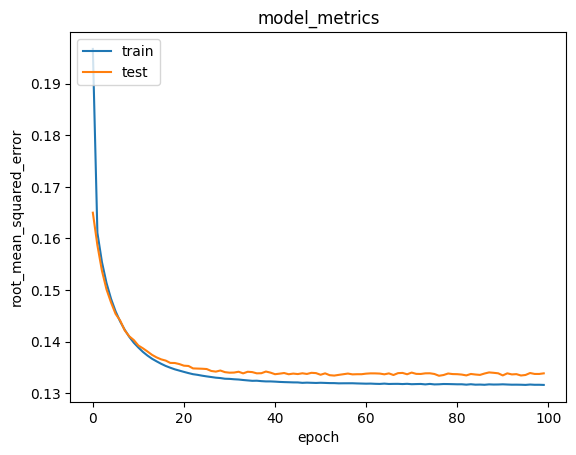

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dari grafik hasil training model, terlihat bahwa nilai RMSE pada data training dan validation terus menurun dan stabil, menunjukkan bahwa model berhasil mempelajari representasi preferensi pengguna dengan cukup baik. Berikut adalah visualisasi metriknya:

### Mendapatkan Rekomendasi Anime

In [ ]:
anime_df = data
df = pd.read_csv('/kaggle/input/anime-recommendations-database/rating.csv')

# Mengambil sample user
user_id = df.user_id.sample(1).iloc[0]
anime_watched_by_user = df[df.user_id == user_id]

# Operator bitwise (~)
anime_not_watched = anime_df[~anime_df['id'].isin(anime_watched_by_user.anime_id.values)]['id']
anime_not_watched = list(
    set(anime_not_watched)
    .intersection(set(anime_to_anime_encoded.keys()))
)

anime_not_watched = [[anime_to_anime_encoded.get(x)] for x in anime_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

In [ ]:
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('anime with high ratings from user')
print('----' * 8)

top_anime_user = (
    anime_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)

anime_df_rows = anime_df[anime_df['id'].isin(top_anime_user)]
for row in anime_df_rows.itertuples():
    print(row.anime_name, ':', row.genre)

print('----' * 8)
print('Top 10 anime recommendation')
print('----' * 8)

recommended_anime = anime_df[anime_df['id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.anime_name, ':', row.genre)

305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Showing recommendations for users: 59476
anime with high ratings from user
--------------------------------
Beck : Comedy, Drama, Music, Shounen, Slice of Life
Pokemon: Mewtwo no Gyakushuu : Action, Adventure, Comedy, Drama, Fantasy, Kids
Kage kara Mamoru! : Comedy, Romance, Shounen
Suzumiya Haruhi no Yuuutsu : Comedy, Mystery, Parody, School, Sci-Fi, Slice of Life
Zero no Tsukaima: Futatsuki no Kishi : Action, Adventure, Comedy, Ecchi, Fantasy, Harem, Magic, Romance, School
--------------------------------
Top 10 anime recommendation
--------------------------------
Ginga Eiyuu Densetsu : Drama, Military, Sci-Fi, Space
Gintama : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Fullmetal Alchemist: Brotherhood : Action, Adventure, Drama, Fantasy, Magic, Military, Shounen
Steins;Gate : Sci-Fi, Thriller
Gintama&#039; : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Hunter x Hunter (2011) : Action, Adventure, Shounen, Supe

Prediksi rating terhadap anime yang belum ditonton untuk user tertentu menunjukkan hasil yang masuk akal, dan 10 rekomendasi teratas mencerminkan relevansi terhadap anime yang sebelumnya disukai oleh pengguna tersebut.